## AI and Cytopath of Thyroid Cancer Project
#### Last Update Date: 8/15/2019

### 1. Data Description
Thyroid cell images under 40 magnificance using papanicolaou stain

##### Benign
* Case 1: Cell (37 images) + Colloid (2 images)
* Case 2: Cell (30 images) + Colloid (10 images)
* Case 3: Cell (50 images) + Colloid (25 images)

##### Cancer
* Case 1: 50 (images)
* Case 2: 30 (images)
* Case 3: 30 (images)
* Case 4: 100 (images)

### 2. Import the code

In [1]:
import load # code for loading, transforming, visualzing images
import model_func # code for building the CNN modle
import test # code for testing the modle
import torch # code for setting the random seed


a.     Training dataset

    Benign: 75 images (from benign case 3)

    Cancer: 75 images (from PTC case 2 and 4)

 

b.     Validation dataset

    Benign: 39 images (from benign case 1)

    Cancer: 50 images (from PTC case 1)


c.     Test dataset (test on the new case)

    Benign: 40 images (from benign case 2)

    Cancer: 30 images (from PTC case 3)


In [2]:
# path of images storage location
data_dir = "/Users/pro/Desktop/practicum/new_data/data_for_code/balanced"
# set the random seed
torch.manual_seed(1)
# load the images (add image path, batch how many images put into model for training one time)
train_dataloaders, vaild_dataloaders, test_dataloaders = load.loaddata(data_dir, batch = 40)

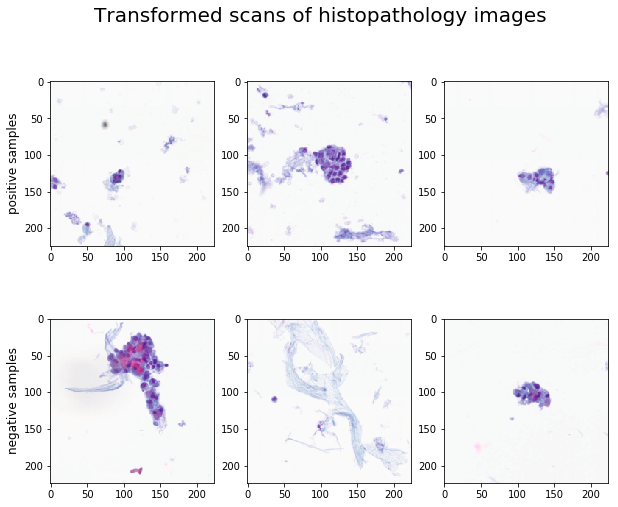

In [3]:
# check the images
images, labels = next(iter(train_dataloaders))
load.multishow(images, labels, num=3)

In [4]:
torch.manual_seed(1)

# set the model (set the learning rate)
model, criterion, optimizer = model_func.setup_model(lr=0.0001)

# train the model
model_func.train_model(model, criterion, optimizer, train_dataloaders, vaild_dataloaders, power = 'GPU', epochs=5)

epoch 1/5 Training loss: 0.6739  Vaildation loss: 1.935 Accurancy:0.6806 Specificity:0.6923 Sensitivity:0.68
epoch 2/5 Training loss: 0.5526  Vaildation loss: 1.919 Accurancy:0.6472 Specificity:0.7179 Sensitivity:0.58
epoch 3/5 Training loss: 0.4268  Vaildation loss: 1.668 Accurancy:0.6722 Specificity:0.5385 Sensitivity:0.78
epoch 4/5 Training loss: 0.3507  Vaildation loss: 1.598 Accurancy:0.6759 Specificity:0.4103 Sensitivity:0.82
epoch 5/5 Training loss: 0.2495  Vaildation loss: 1.79 Accurancy:0.6602 Specificity:0.6667 Sensitivity:0.72
Finished!


In [5]:
model_func.train_model(model, criterion, optimizer, train_dataloaders, vaild_dataloaders, power = 'GPU', epochs=2)

epoch 1/2 Training loss: 0.1741  Vaildation loss: 1.62 Accurancy:0.7213 Specificity:0.4359 Sensitivity:0.84
epoch 2/2 Training loss: 0.1342  Vaildation loss: 1.634 Accurancy:0.7213 Specificity:0.3846 Sensitivity:0.88
Finished!


In [6]:
# test model performance
test.test_model(model, test_dataloaders, criterion)

Accurancy:0.6429
0.6666666666666666
0.625


### 4. Train on the unbalanced datasets 
a.     Training dataset

    Benign: 75 images (from benign case 3)

    Cancer: 160 images (from PTC case 2 and 4)

 

b.     Validation dataset

    Benign: 39 images (from benign case 1)

    Cancer: 50 images (from PTC case 1)


c.     Test dataset (test on the new case)

    Benign: 40 images (from benign case 2)

    Cancer: 30 images (from PTC case 3)

In [15]:
# path of images storage location
data_dir = "/Users/pro/Desktop/practicum/new_data/data_for_code/unbalanced"
# set the random seed
torch.manual_seed(1)
# load the images (add image path, batch how many images put into model for training one time)
train_dataloaders, vaild_dataloaders, test_dataloaders = load.loaddata(data_dir, batch = 35)

In [16]:
model, criterion, optimizer = model_func.setup_model(lr=0.00005)
torch.manual_seed(1)
model_func.train_model(model, criterion, optimizer, train_dataloaders, vaild_dataloaders, power = 'GPU', epochs= 5)

epoch 1/5 Training loss: 0.6258  Vaildation loss: 1.985 Accurancy:0.5667 Specificity:0.0 Sensitivity:1.0
epoch 2/5 Training loss: 0.5388  Vaildation loss: 1.941 Accurancy:0.6111 Specificity:0.1026 Sensitivity:1.0
epoch 3/5 Training loss: 0.4392  Vaildation loss: 1.815 Accurancy:0.6659 Specificity:0.3077 Sensitivity:0.94
epoch 4/5 Training loss: 0.3584  Vaildation loss: 1.907 Accurancy:0.6774 Specificity:0.2821 Sensitivity:0.98
epoch 5/5 Training loss: 0.273  Vaildation loss: 1.842 Accurancy:0.6877 Specificity:0.3846 Sensitivity:0.92
Finished!


In [17]:
test_model(model, test_dataloaders, criterion)

Accurancy:0.6571
0.9
0.475


### 4. Train on the datasets without test
a.     Training dataset

    Benign: 114 images (from benign case 1 and 3)

    Cancer: 210 images (from PTC case 1, 2 and 4)


b.     Vaildation dataset (test on the new case)

    Benign: 40 images (from benign case 2)

    Cancer: 30 images (from PTC case 3)

In [2]:
# path of images storage location
data_dir = "/Users/pro/Desktop/practicum/new_data/data_for_code/without_test/"
# set the random seed
torch.manual_seed(1)
# load the images (add image path, batch how many images put into model for training one time)
train_dataloaders, vaild_dataloaders, test_dataloaders = load.loaddata(data_dir, batch = 30)

In [3]:
model, criterion, optimizer = model_func.setup_model(lr=0.00005)
torch.manual_seed(1)
model_func.train_model(model, criterion, optimizer, train_dataloaders, vaild_dataloaders, power = 'GPU', epochs= 5)

epoch 1/5 Training loss: 0.6657  Vaildation loss: 1.275 Accurancy:0.7667 Specificity:0.7 Sensitivity:0.8333
epoch 2/5 Training loss: 0.5647  Vaildation loss: 1.15 Accurancy:0.7667 Specificity:0.7 Sensitivity:0.8333
epoch 3/5 Training loss: 0.4487  Vaildation loss: 1.056 Accurancy:0.7833 Specificity:0.7667 Sensitivity:0.8
epoch 4/5 Training loss: 0.3668  Vaildation loss: 1.027 Accurancy:0.7333 Specificity:0.7667 Sensitivity:0.7
epoch 5/5 Training loss: 0.2913  Vaildation loss: 1.016 Accurancy:0.6833 Specificity:0.7 Sensitivity:0.6667
Finished!


In [5]:
model, criterion, optimizer = model_func.setup_model(lr=0.00001)
torch.manual_seed(1)
model_func.train_model(model, criterion, optimizer, train_dataloaders, vaild_dataloaders, power = 'GPU', epochs= 40)

epoch 1/10 Training loss: 0.628  Vaildation loss: 2.047 Accurancy:0.4286 Specificity:0.0 Sensitivity:1.0
epoch 2/10 Training loss: 0.5399  Vaildation loss: 1.909 Accurancy:0.5286 Specificity:0.175 Sensitivity:1.0
epoch 3/10 Training loss: 0.4336  Vaildation loss: 1.792 Accurancy:0.6286 Specificity:0.4 Sensitivity:0.9333
epoch 4/10 Training loss: 0.3519  Vaildation loss: 1.8 Accurancy:0.6429 Specificity:0.45 Sensitivity:0.9
epoch 5/10 Training loss: 0.277  Vaildation loss: 1.821 Accurancy:0.6 Specificity:0.425 Sensitivity:0.8333
epoch 6/10 Training loss: 0.2226  Vaildation loss: 1.785 Accurancy:0.6857 Specificity:0.625 Sensitivity:0.7667
epoch 7/10 Training loss: 0.1879  Vaildation loss: 1.807 Accurancy:0.6429 Specificity:0.475 Sensitivity:0.8667
epoch 8/10 Training loss: 0.1399  Vaildation loss: 1.678 Accurancy:0.6571 Specificity:0.575 Sensitivity:0.7667
epoch 9/10 Training loss: 0.1129  Vaildation loss: 1.771 Accurancy:0.7 Specificity:0.5 Sensitivity:0.9667
epoch 10/10 Training loss: 

In [4]:
model_func.train_model(model, criterion, optimizer, train_dataloaders, vaild_dataloaders, power = 'GPU', epochs= 10)

epoch 1/10 Training loss: 0.2339  Vaildation loss: 1.044 Accurancy:0.7 Specificity:0.7333 Sensitivity:0.6667
epoch 2/10 Training loss: 0.2019  Vaildation loss: 1.077 Accurancy:0.7167 Specificity:0.8333 Sensitivity:0.6
epoch 3/10 Training loss: 0.1537  Vaildation loss: 1.086 Accurancy:0.6833 Specificity:0.7333 Sensitivity:0.6333
epoch 4/10 Training loss: 0.1348  Vaildation loss: 1.069 Accurancy:0.7167 Specificity:0.7333 Sensitivity:0.7
epoch 5/10 Training loss: 0.1074  Vaildation loss: 1.128 Accurancy:0.7 Specificity:0.8333 Sensitivity:0.5667
epoch 6/10 Training loss: 0.07738  Vaildation loss: 1.056 Accurancy:0.7333 Specificity:0.7667 Sensitivity:0.7
epoch 7/10 Training loss: 0.06531  Vaildation loss: 1.06 Accurancy:0.7333 Specificity:0.8 Sensitivity:0.6667
epoch 8/10 Training loss: 0.05559  Vaildation loss: 1.043 Accurancy:0.7333 Specificity:0.8 Sensitivity:0.6667
epoch 9/10 Training loss: 0.0538  Vaildation loss: 1.075 Accurancy:0.75 Specificity:0.8667 Sensitivity:0.6333


KeyboardInterrupt: 